In [1]:
import torch
from IPython.display import Image

In [2]:
model = torch.hub.load("ultralytics/yolov5", "yolov5n", pretrained=True)

Using cache found in /home/sega/.cache/torch/hub/ultralytics_yolov5_master


requirements: /home/sega/.cache/torch/hub/requirements.txt not found, check failed.


YOLOv5 🚀 2023-5-3 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model_path = f"model_first.onnx"
torch.onnx.export(model, torch.empty(size=(1, 3, 640, 640)).cuda(), model_path)

/home/sega/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:515: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  y = self.model(im, augment=augment, visualize=visualize) if augment or visualize else self.model(im)
/home/sega/.cache/torch/hub/ultralytics_yolov5_master/models/yolo.py:64: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if self.dynamic or self.grid[i].shape[2:4] != x[i].shape[2:4]:


============= Diagnostic Run torch.onnx.export version 2.0.0+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [8]:
!python yolov5/export.py --weights yolov5n.pt --include onnx --simplify

export: data=yolov5/data/coco128.yaml, weights=['yolov5n.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=True, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.10 torch-2.0.0+cu117 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients

PyTorch: starting from yolov5n.pt with output shape (1, 25200, 85) (3.9 MB)

ONNX: starting export with onnx 1.14.0...
============= Diagnostic Run torch.onnx.export version 2.0.0+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

requirements: YOLOv5 requirements "onnxruntime" "onnx-simplifier>=0.4.1" not found, attempting AutoUpdate...

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice]

# Train

In [5]:
!python yolov5/train.py --batch-size 24 --epochs 160 --data "dataset/data.yaml" --weights yolov5n.pt --workers 2

train: weights=yolov5n.pt, cfg=, data=dataset/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=160, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
requirements: /home/sega/progs/AI_Tasks/03_Task/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.00

# Train info

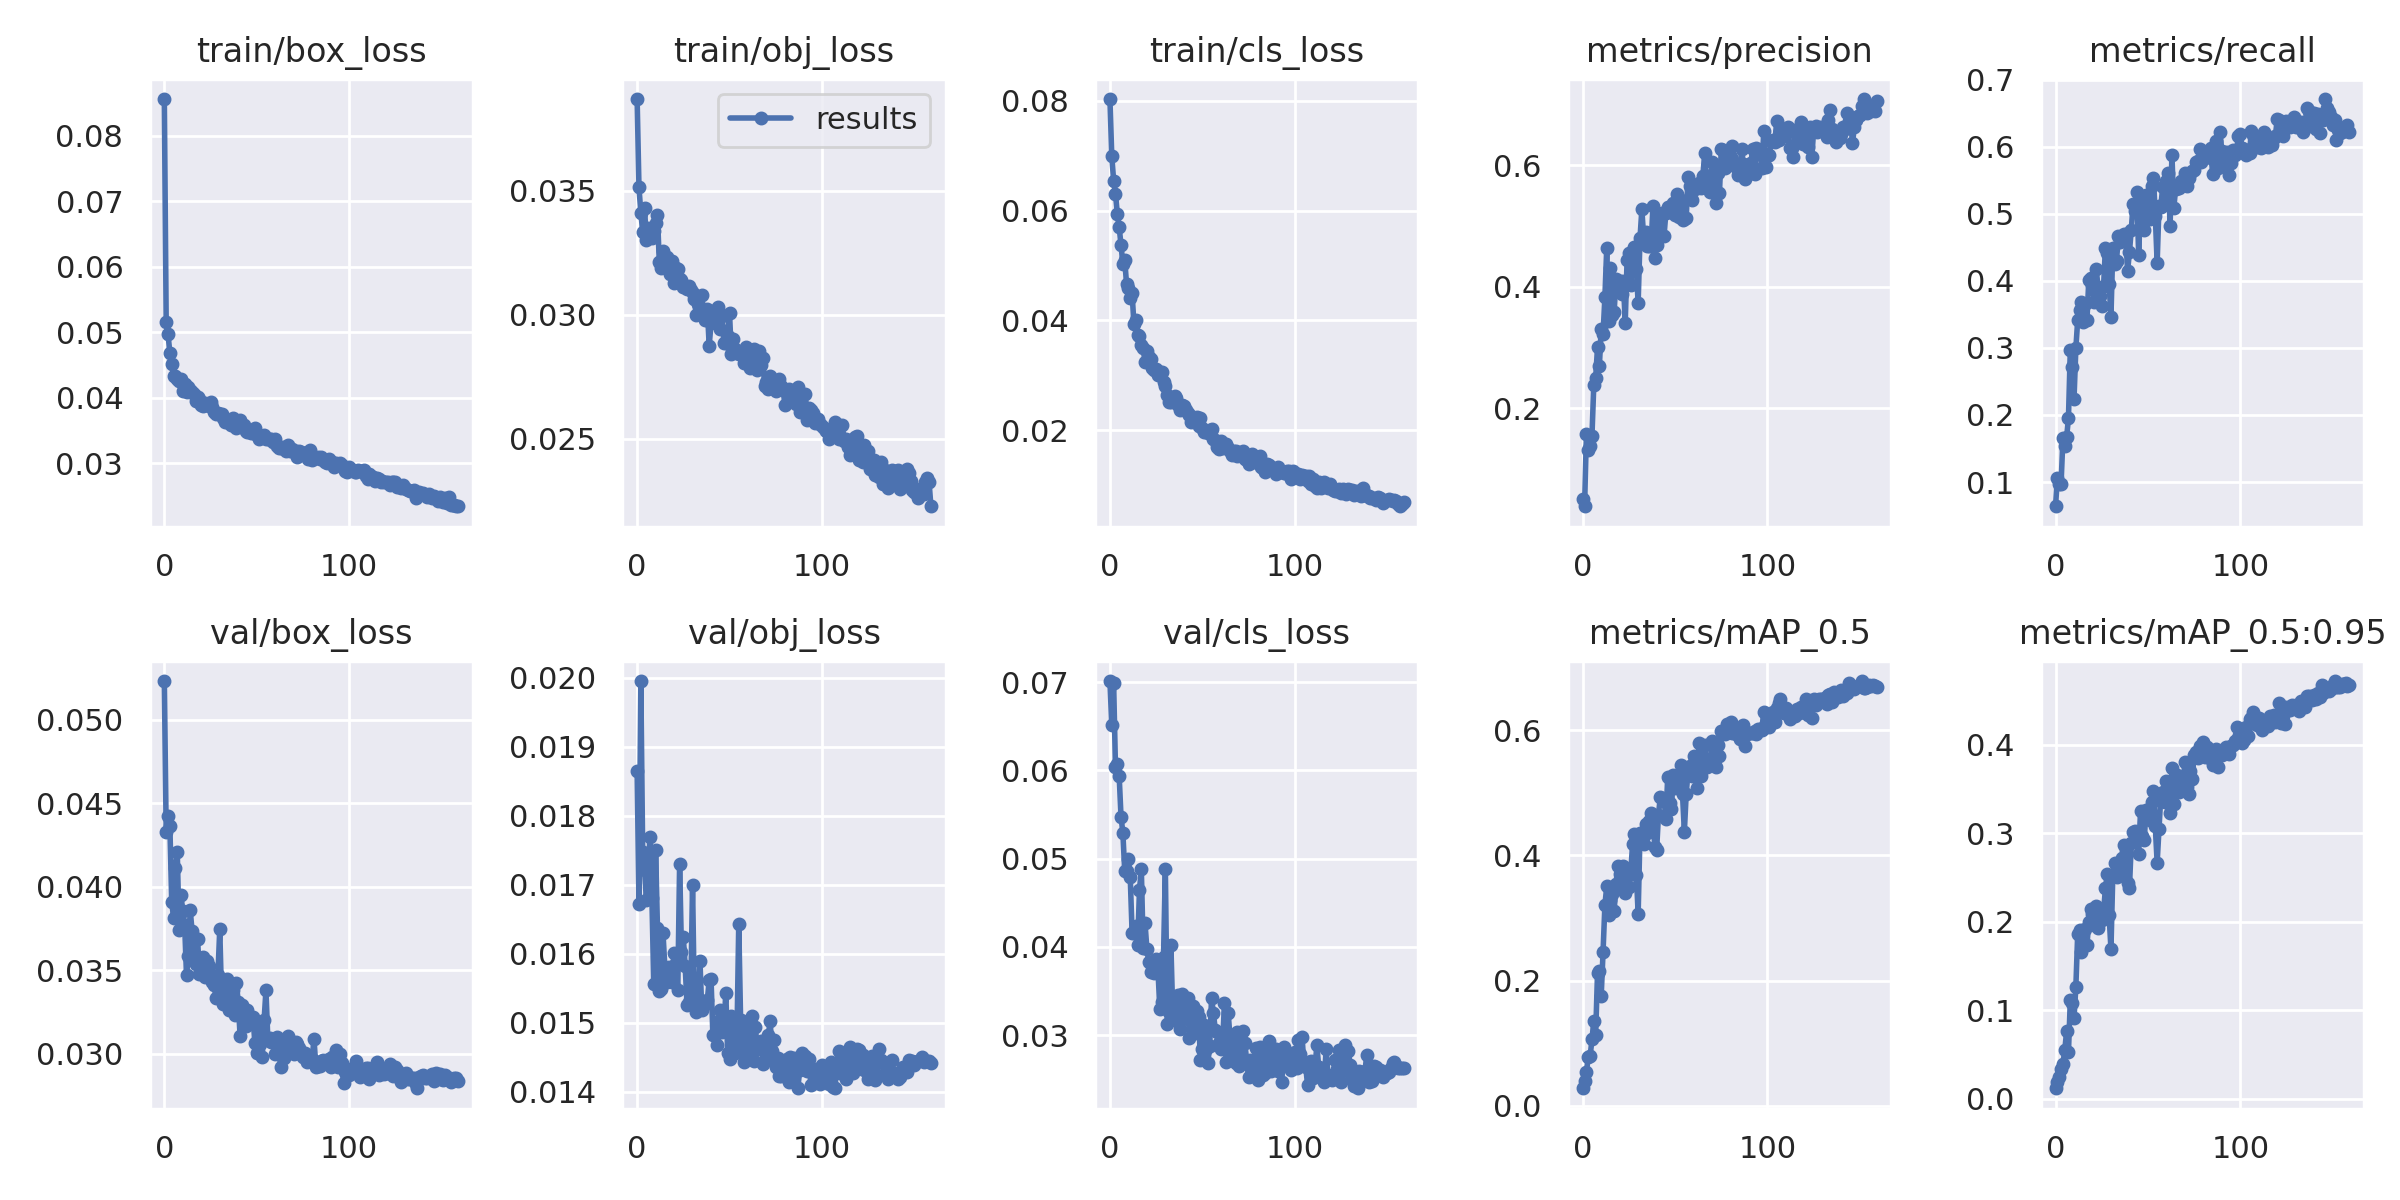

In [8]:
Image(filename='yolov5/runs/train/exp11/results.png', width=1000)

# Validate

In [6]:
!python yolov5/val.py --weights "yolov5/runs/train/exp11/weights/best.pt" --data "dataset/data.yaml" --task val

val: data=dataset/data.yaml, weights=['yolov5/runs/train/exp11/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /home/sega/progs/AI_Tasks/03_Task/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 1787578 parameters, 0 gradients, 4.2 GFLOPs
val: Scanning /home/sega/progs/AI_Tasks/03_Task/dataset/valid/labels.cache... 79
                 Class     Images  Instances          P          R      mAP50   
                   all        798       1801      0.698      0.641      0.679      0.472
     Agaricus bisporus        798        105      0.708      0.724       0.69      0.555


# Test

In [16]:
!python yolov5/val.py --weights "yolov5/runs/train/exp11/weights/best.pt" --data "dataset/data.yaml" --task test

val: data=dataset/data.yaml, weights=['yolov5/runs/train/exp11/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: /home/sega/progs/AI_Tasks/03_Task/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 1787578 parameters, 0 gradients, 4.2 GFLOPs
test: Scanning /home/sega/progs/AI_Tasks/03_Task/dataset/test/labels.cache... 82
                 Class     Images  Instances          P          R      mAP50   
                   all        827       1838      0.702       0.65       0.69      0.485
     Agaricus bisporus        827         79       0.44      0.696      0.572      0.444

# Detect on Test

In [1]:
import os
from os.path import join as pjoin

def create_dataset_txt_list(target_path, output_txt_name = None):
    if output_txt_name is None:
        output_txt_name = target_path + "_listed.txt"
    images = [pjoin(target_path, filename) for filename in sorted(os.listdir(target_path))]
    print(f"Found {len(images)} files")
    print(f"Generating txt list with name '{output_txt_name}'")
    with open(output_txt_name, "w") as out_txt:
        for line in images:
            out_txt.write(f"{line}\n")
    return images
test_list = create_dataset_txt_list("dataset/test/images")

Found 827 files
Generating txt list with name 'dataset/test/images_listed.txt'


In [2]:
for image in test_list:
    !python yolov5/detect.py --weights "yolov5/runs/train/exp11/weights/best.pt" --data "dataset/data.yaml" --source "{image}" --exist-ok

detect: weights=['yolov5/runs/train/exp11/weights/best.pt'], source=dataset/test/images/000001-6-_png_jpg.rf.51004e755392395df7d7c1f5ccf2fe1e.jpg, data=dataset/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /home/sega/progs/AI_Tasks/03_Task/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.10 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1060 6GB, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 1787578 parameters, 0 gradients, 4.2 GFLOPs
image 1/1 /home/sega/progs/AI_Tasks/03_Task/dataset/test/images/000001-6-_png_jpg.rf.51004e755392395df7d7c1f5ccf2fe1e.jpg: 640x640 6 Lentinus edodess, 6.6ms
Speed: 0.

## Картинки

### yolo структура

![Alt text](images/O-stage%20detector_yolo_basic.png)
--------------
![Alt text](images/yolov5_struct.png)
--------------
![Alt text](images/Yolo_struct_1.png)



### anchors

![Alt text](images/BB_info.png)
-------------
![Alt text](images/ancors.jpg)

### output

![Alt text](images/yolo_output.jpg)

![Alt text](images/detection_exp.jpg)

## Augmentations

![Alt text](images/augs/aug_grid_cut_out.png)
-----------
![Alt text](images/augs/augs_cut_out.png)
-----------
 ![Alt text](images/augs/augs_mixup.png)
-----------
  ![Alt text](images/augs/augs_mosaic.png)
-----------
   ![Alt text](images/augs/augs_several.png)
-----------
